In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading Data

In [31]:
data = pd.read_csv('data.csv')

data.describe()

,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


## Distrubation histogram

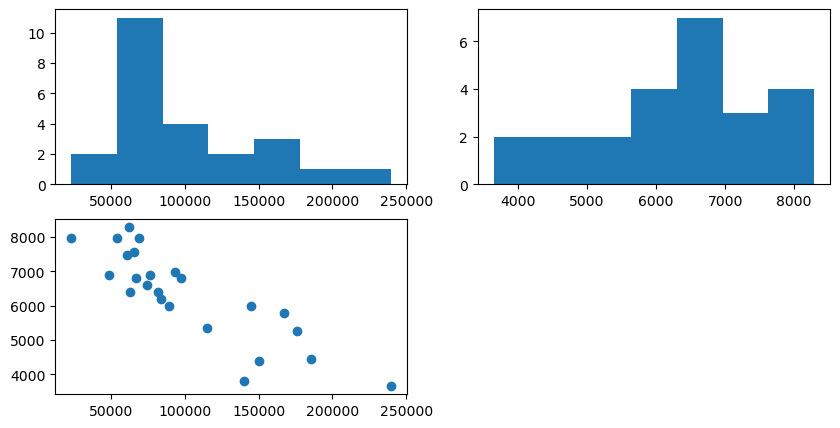

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0, 0].hist(data['km'], bins=7)
axs[0, 1].hist(data['price'], bins=7)
axs[1, 0].scatter(x=data['km'], y=data['price'])

# Hide the empty subplot
fig.delaxes(axs[1, 1])

plt.show()

In [33]:
# ss_mean = len(data) * var_mean
#sum of square over the mean
ss_mean = np.sum((data['price'] - data['price'].mean()) ** 2)
varmean = ss_mean / len(data)


In [ ]:
# Perform least squares fit manually
x = data['km']
y = data['price']
n = len(x)

# Calculate the slope (m) and intercept (b)
m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x ** 2) - np.sum(x) ** 2)
b = (np.sum(y) - m * np.sum(x)) / n

# Calculate the fitted line
fit_line = m * x + b

# Calculate R-squared value
ss_total = np.sum((data['price'] - data['price'].mean()) ** 2)
ss_residual = np.sum((data['price'] - fit_line) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Calculate the least squared estimate for the slope
slope = fit[0]

# Print the results
print(f"Fit coefficients: {fit}")
print(f"R-squared: {r_squared}")
print(f"Least squared estimate for the slope: {slope}")

# Check the importance of data['km'] to varmean
importance = r_squared * varmean
print(f"Importance of data['km'] to varmean: {importance}")


#this mean theres 0,73 percents of reduction variation when we take the km to the price into account

Fit coefficients: [-2.14489636e-02  8.49959965e+03]
R-squared: 0.7329747078314965
Least squared estimate for the slope: -0.02144896359170235
Importance of data['km'] to varmean: 1223279.9771509487


In [39]:


def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1/(2*m)) * np.sum((predictions - y)**2)

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Include intercept term (column of 1s)
y = np.array([1, 2, 3])
theta = np.zeros(2)
alpha = 0.1
iterations = 1000
theta, costs = gradient_descent(X, y, theta, alpha, iterations)
print(theta)
pr = 2 * theta[0] + theta[1]
print(pr)

[2.06458287e-06 9.99999092e-01]
1.0000032209521874


## Snagat Poc for simple linear regression using Gradient Descent

In [57]:
def linear_regression(x, y):
    a = b = 0
    alpha = 0.01
    for _ in range(1000):
        ypred = a * x + b
        der_a = np.sum((ypred - y) * x)
        der_b = np.sum(ypred - y)
        a -= alpha * der_a / len(y)
        b -= alpha * der_b / len(y)
    return a, b

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
a , b = linear_regression(x, y)

print(2 * a + b)

6.813388860197202


In [95]:
def linear_regression_vectorize(theta,X, y):
    alpha = 0.1
    m = len(y)
    for _ in range(1000):
        ypred = X.dot(theta)
        print(ypred.shape)
        grad = 1/m * X.T.dot(ypred - y)
        print(grad.shape)
        theta = theta - alpha * grad
    return theta

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])
# a , b = linear_regression_vectorize(x,y)
X = np.vstack((np.ones(len(x)), x)).T


theta = np.zeros(2)
theta.reshape(1,2)

thetas = linear_regression_vectorize(theta, X, y)

result = 4 * thetas[1] + thetas[0]
print(result)


(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)
(5,)
(2,)


## Now we working on real project aka ft_linear_regression

In [98]:
%matplotlib inline

Fitted coefficients (custom): (2.3666254141592853e-16, -0.8561024601837492)
thetas: 8499.506064757234, -0.02144803761318838


/var/folders/dn/20_wz9v90k523gyfbn33x50m0000gn/T/ipykernel_53428/1667899706.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(self.x1, self.y1, cmap='winter', label='Data points')


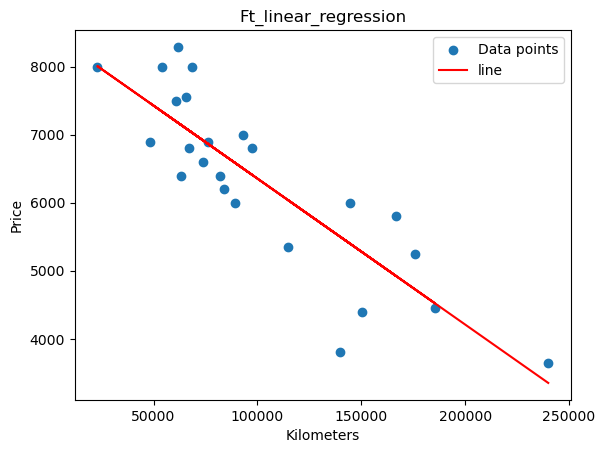

Mean Squared Error (custom): 445645.2473511696
R-squared (custom): 0.7329747064654101
Model Accuracy (custom): 73.297470646541%
8421.220727469095


In [45]:

class LinearRegression1337:
	def __init__(self):
		self.theta = np.zeros(2)
		self.iterations = 1000
		self.data = pd.read_csv('data_v2.csv')
		self.alpha = 0.01  # learning rate
		self.m = len(self.data)
		self.x1 = np.array(self.data['km'])
		self.y1 = np.array(self.data['price'])

		self.mean_x1 = np.mean(self.x1)
		self.std_x1 = np.std(self.x1)
		self.mean_y1 = np.mean(self.y1)
		self.std_y1 = np.std(self.y1)

		self.x = (self.x1 - self.mean_x1) / self.std_x1
		self.y = (self.y1 - self.mean_y1) / self.std_y1
		self.X = np.vstack((np.ones(self.m), self.x)).T

	def gradient_descent(self):
		for _ in range(self.iterations):
			y_pred = self.X.dot(self.theta)
			grad = 1/self.m * self.X.T.dot(y_pred - self.y)
			self.theta -= self.alpha * grad
		return self.theta

	def fit(self):
		self.theta = self.gradient_descent()
		return self.theta

	def predict(self, x):
		x_standardized = (x - self.mean_x1) / self.std_x1
		X_pred = np.vstack((np.ones(len(x_standardized)), x_standardized)).T
		y_pred_standardized = X_pred.dot(self.theta)
		return y_pred_standardized * self.std_y1 + self.mean_y1

	def plot_fit(self):
		fig, ax = plt.subplots()
		ax.scatter(self.x1, self.y1, cmap='winter', label='Data points')
		ax.plot(self.x1, self.predict(self.x1),color='red', label='line')
		ax.set(ylabel='Price', xlabel='Kilometers', title="Ft_linear_regression")
		ax.legend()
		plt.show()

	def mse(self):
		y_pred = self.predict(self.x1)
		mse_value = np.mean((self.y1 - y_pred) ** 2)
		return mse_value

	def r_squared(self):
		y_pred = self.predict(self.x1)
		ss_total = np.sum((self.y1 - np.mean(self.y1)) ** 2)
		ss_residual = np.sum((self.y1 - y_pred) ** 2)
		r2 = 1 - (ss_residual / ss_total)
		return r2

	def model_accuracy(self):
		r2 = self.r_squared()
		return r2 * 100

	def print_metrics(self):
		mse_value = self.mse()
		r2_value = self.r_squared()
		accuracy = self.model_accuracy()
		print(f"Mean Squared Error (custom): {mse_value}")
		print(f"R-squared (custom): {r2_value}")
		print(f"Model Accuracy (custom): {accuracy}%")
	def get_thatas(self):
		theta1_original = self.theta[1] * (self.std_y1 / self.std_x1)
		theta0_original = self.mean_y1 + self.std_y1 * self.theta[0] - theta1_original * self.mean_x1
		return theta0_original , theta1_original 


# Example usage:
model = LinearRegression1337()
theta = model.fit()
thetas = model.get_thatas()
print(f"Fitted coefficients (custom): {theta[0], theta[1]}")
print(f"thetas: {thetas[0]}, {thetas[1]}")
model.plot_fit()

# Predicting after standardization
predictions = model.predict(np.array(model.data['km']))
pd.DataFrame(predictions, model.data['price']).to_csv("predicted.csv")

# Calculate and print MSE, R-squared, and model accuracy
model.print_metrics()
print(3650 * thetas[1] + thetas[0])

In [43]:
print(240000 * thetas[1] + thetas[0])

3351.9770375920216
